In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm #barra de progreso`
import cv2
from glob import glob

#para redimencionar
import sklearn
import skimage 
from skimage.transform import resize

import random
#Usaremos datetime para nombrar archivos
import datetime

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from skimage.color import *
from skimage.filters import meijering, sato, frangi, hessian


print(tf.__version__)

5+8


ModuleNotFoundError: No module named 'pandas'

In [37]:
train_dir = "images/train/"
test_dir =  "images/test/"

LOAD_FROM_IMAGES = False

def get_data(folder):
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['A2']:
                label = 1
            elif folderName in ['B']:
                label = 2
            elif folderName in ['B2']:
                label = 3
            elif folderName in ['C']:
                label = 4
            elif folderName in ['D']:
                label = 5
            elif folderName in ['D2']:
                label = 6
            elif folderName in ['E']:
                label = 7
            elif folderName in ['E2']:
                label = 8
            elif folderName in ['F']:
                label = 9
            elif folderName in ['F2']:
                label = 10
            elif folderName in ['G']:
                label = 11
            elif folderName in ['G2']:
                label = 12
            elif folderName in ['H']:
                label = 13
            elif folderName in ['H2']:
                label = 14
            elif folderName in ['I']:
                label = 15
            elif folderName in ['I2']:
                label = 16
            elif folderName in ['J']:
                label = 17
            elif folderName in ['J2']:
                label = 18
            elif folderName in ['K']:
                label = 19
            elif folderName in ['L']:
                label = 20
            elif folderName in ['L2']:
                label = 21
            elif folderName in ['M']:
                label = 22
            elif folderName in ['M2']:
                label = 23
            elif folderName in ['N']:
                label = 24
            elif folderName in ['N2']:
                label = 25
            elif folderName in ['N3']:
                label = 26
            elif folderName in ['N4']:
                label = 27
            elif folderName in ['O']:
                label = 28
            elif folderName in ['P']:
                label = 29
            elif folderName in ['Q']:
                label = 30
            elif folderName in ['Q2']:
                label = 31
            elif folderName in ['R']:
                label = 32
            elif folderName in ['R2']:
                label = 33
            elif folderName in ['S']:
                label = 34
            elif folderName in ['T']:
                label = 35
            elif folderName in ['T2']:
                label = 36
            elif folderName in ['U']:
                label = 37
            elif folderName in ['U2']:
                label = 38
            elif folderName in ['V']:
                label = 39
            elif folderName in ['W']:
                label = 40
            elif folderName in ['X']:
                label = 41
            elif folderName in ['Y']:
                label = 42
            elif folderName in ['Z']:
                label = 43  
            else:
                label = 44
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    ##img_file=np_img = meijering(img_file)
                    img_file = skimage.transform.resize(img_file, (28, 28, 3),mode='constant',anti_aliasing=True)
                    img_file = rgb2gray(img_file)
                    #img_file = scipy.misc.imresize(arr=img_file, size=(150, 150, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y


if LOAD_FROM_IMAGES:
    #cargamos las imágenes a los arrays
    X_train, y_train = get_data(train_dir)
    X_test, y_test= get_data(test_dir)
    
    #grabamos los arrays en archivos
    np.save('xtrain.npy', X_train)
    np.save('ytrain.npy', y_train)
    np.save('xtest.npy', X_test)
    np.save('ytest.npy', y_test)
else:
    #cargamos los arrays anteriormente grabados
    X_train = np.load('xtrain.npy')
    y_train = np.load('ytrain.npy')
    X_test = np.load('xtest.npy')
    y_test = np.load('ytest.npy')

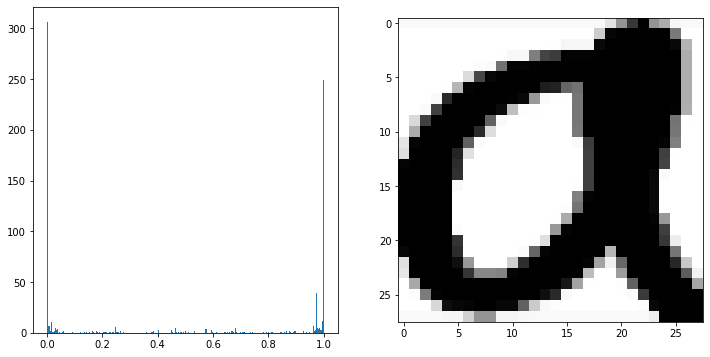

In [38]:
def plotHistogram(a):
    plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)
    plt.hist(a.ravel(), bins=255)
    plt.subplot(1, 2, 2)
    plt.imshow(a, cmap='gray', vmin=0, vmax=1)
    plt.show()
    
plotHistogram(X_train[46])


In [39]:
X_trainReshaped = X_train.reshape(len(X_train),28,28,1)
X_testReshaped = X_test.reshape(len(X_test),28,28,1)

In [40]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())

model.add(layers.Dense(44, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 44)                140844    
Total params: 215,340
Trainable params: 215,340
Non-trainable params: 0
________________________________________________

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


###Checkpoints
checkpoint_path = "checkpoints/modelo.h5";

ENTRENAR=True

if ENTRENAR:
    log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    cp_callbacks = tf.keras.callbacks.ModelCheckpoint(checkpoint_path)
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

    model.fit(X_trainReshaped, 
              y_train, 
              epochs=20,
              validation_data = (X_testReshaped,y_test),
              callbacks = [cp_callbacks, tensorboard_callback])
else:
    model.load_weights(checkpoint_path)

epoca: 20/20
accuracy: 97.8/92.5


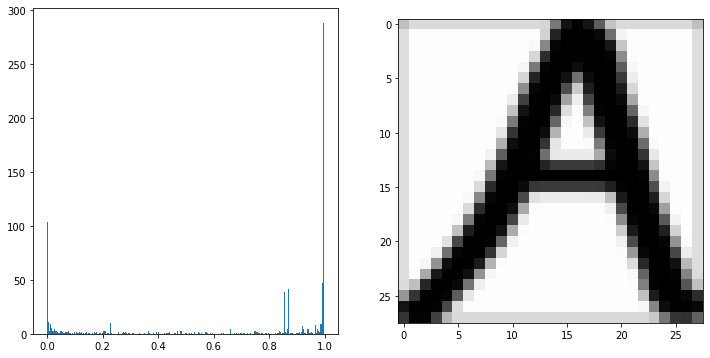

(28, 28)

In [23]:

#para cargar imagenes de prueba
from PIL import Image
import requests
from io import BytesIO

img = Image.open('af2.jpg')
np_img = np.array(img)
##np_img = meijering(np_img)
##np_img = rgb2hed(np_img)

np_img = skimage.transform.resize(np_img, (28, 28, 3),mode='constant',anti_aliasing=True)


np_img = rgb2gray(np_img)

# mostramos la imagen
plotHistogram(np_img)

np_img.shape

In [24]:
np_img = np_img.reshape(1,28,28,1)
np_img.shape

(1, 28, 28, 1)

In [25]:
predictions = model.predict(np_img)
predictions[0]

array([9.4286648e-11, 9.9999905e-01, 9.2475007e-29, 7.8968382e-15,
       0.0000000e+00, 2.0039536e-20, 3.1759065e-22, 1.1431820e-36,
       0.0000000e+00, 7.3370325e-22, 4.8472990e-30, 4.0002592e-15,
       4.4335566e-25, 4.4944568e-15, 1.6971779e-17, 1.5685029e-38,
       0.0000000e+00, 5.1522228e-26, 2.2168757e-24, 1.3026197e-21,
       5.9217254e-31, 5.0432716e-25, 2.2163020e-23, 3.3907279e-13,
       8.0034764e-13, 8.0906103e-24, 3.4012422e-12, 1.1763763e-33,
       6.9300911e-32, 8.7126069e-30, 4.4315922e-19, 1.0278821e-20,
       1.2585045e-34, 9.4693701e-07, 1.1351586e-16, 1.1426507e-20,
       2.7276241e-25, 1.0696969e-28, 9.0987062e-31, 0.0000000e+00,
       3.5815095e-34, 1.2759513e-25, 1.6042446e-27, 1.5970696e-35],
      dtype=float32)

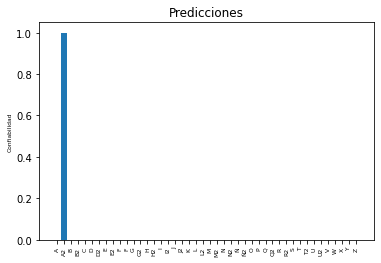

In [42]:
class_names=['A','A2','B','B2','C','D','D2','E','E2','F','F','G','G2','H','H2','I','I2','J','J2','K','L','L2','M','M2','N','N2','Ñ','Ñ2','O','P','Q','Q2','R','R2','S','T','T2','U','U2','V','W','X','Y','Z']
index = np.arange(len(class_names))
plt.bar(index, predictions[0])
plt.ylabel('Confiabilidad', fontsize=6)
plt.xticks(index, class_names, fontsize=6, rotation=90)
plt.title('Predicciones')
plt.show()

In [30]:


converter= tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()

open("modeloLite.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\halog\AppData\Local\Temp\tmp48ck6mb7\assets


864104

In [100]:
##convertir a js para React native
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model,"./tfjs_files")

C:\Users\halog\anaconda3\envs\eduwrite\lib\site-packages\tensorflowjs\converters\keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)
